<a href="https://colab.research.google.com/github/MarvinLopezOsorio/AnaliticaPredictiva_TrabajoFinal/blob/main/Trabajo%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

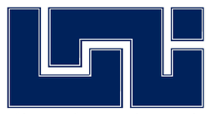

</center>


<center><h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks</center>

[UNI-DEPEC](https://posgrado.uni.edu.ni)

**Estudiantes:** 

*   Marvin López Osorio
*   Eduardo Rivera

# **Trabajo Final**
## **Modelo de Clasificación: Análisis y desarrollo de modelo de clasificación de no aprobación de estudiantes de primer ciclo universitario utilizando Python**
Se desarrolló un modelo de aprendizaje automático de tipo clasificación para predecir el resultado de aprobación de estudiantes en el primer ciclo universitario. 

El estudio se basó en un conjunto de datos generales, encuestas de hábitos de estudio y resultados de análisis psicopedagógicos de los estudiantes del primer ciclo de carreras de ingeniería en una universidad de El Salvador. 

Se confirmaron hipótesis respecto a las relaciones entre las variables involucradas, y a la vez se encontraron correspondencias no previstas entre las variables de estudio.

Se creo un [repositorio en GitHub](https://github.com/MarvinLopezOsorio/AnaliticaPredictiva_TrabajoFinal) donde se almacena la base de datos y el presente cuaderno para consultas futuras.

## **Objetivo**
Predecir si un estudiante reprobará el primer ciclo universitario mediante un modelo de clasificación basado en variables psicopedagógicas, conductuales (malos hábitos) y generales.

## **Antecedentes**
Una universidad de El Salvador desde el año 2013 se planteó el problema de cómo dar acompañamiento a los estudiantes con el objetivo de reducir la deserción en los primeros años de carreras universitarias.


Con la cantidad de estudiantes cercana a siete mil, en el año 2013, se tomaron algunas decisiones:
*   Aplicar una prueba psicométrica para identificar aptitudes y hábitos en los estudiantes de nuevo ingreso.
*   Crear departamento de psicopedagogía que aplicara la prueba y apoyara a los estudiantes, aconsejándoles con base en sus aptitudes.
*   Crear programas de apoyo a los estudiantes para mejorar sus aptitudes.

En base a lo anterior, se creó en el 2014 el departamento 
de psicopedagogía y a partir del 2015 se empezó a aplicar dicha prueba para iniciar una base de datos que sirviera de insumo para crear los programas de apoyo a estudiantes de la universidad.

En 2016, se inició a trabajar en la posibilidad de identificar a los estudiantes que necesitaran mayor orientación para seleccionar la carrera que cursarían y tener éxito en la misma. A partir esta iniciativa, se tomarían decisiones de creación de programas de apoyo y orientación estudiantil para reducir la tasa de deserción que en ese año rondó el 20%.

Se obtuvo de parte del departamento de psicopedagogía una base de datos que contiene datos de 41 carreras, con ingresos de estudiantes entre 2017 y 2021 y las variables psicopedagógicas relevantes.

##**Desarrollo**

###**Descripción de los datos obtenidos**


####****Carga de librerías necesarias****

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

####****Carga de datos****

In [19]:
#Referencias al archivo en repositorio de origen y carga de datos
repo = 'https://github.com/MarvinLopezOsorio/AnaliticaPredictiva_TrabajoFinal/blob/main/Base%20de%20Datos%20Universidad.xlsx?raw=True'
datos = pd.read_excel(repo)
datos.head(3)

,Ingreso,Estado,Sexo,Municipio,Edad,Paes,Carrera,Facultad,Segunda carrera,CUM,Porcentaje de avance,Estado actual,Razonamiento Verbal (DAT- VR),Relaciones Espaciales (DAT - SR),Razonamiento Abstracto (DAT- AR),Aptitud Numérica (DAT - NA),Razonamiento Mecánico (DAT-MR),Rapidez y precisión perceptiva (DAT -CSA),Hábitos,Aprobación,tipo institución
0,2017,ACTIVO,Femenino,Soyapango,23,5.52,Licenciatura en Idiomas con especialidad en la...,Facultad de CC. y Humanidades,NaN,8.4,77.14,ACTIVO,75,15,20,5,45,5,5,Aprobado,Privado
1,2017,ACTIVO,Femenino,Soyapango,23,4.50,Licenciatura en Ciencias de la Comunicación,Facultad de CC. y Humanidades,NaN,8.6,94.00,ACTIVO,75,20,15,50,15,5,1,Aprobado,Privado
2,2017,ACTIVO,Femenino,Soyapango,24,3.83,Licenciatura en Idiomas con especialidad en Tu...,Facultad de CC. y Humanidades,NaN,7.6,79.41,ACTIVO,45,5,10,30,15,5,4,Aprobado,Público


El dataset original continene las siguientes variables:

*   Ingreso, 
*   Estado,
*   Sexo, 
*   Municipio, 
*   Edad, 
*   Paes, 
*   Carrera,
*   Facultad, 
*   Segunda carrera, 
*   CUM, 
*   Porcentaje de avance,
*   Estado actual, 
*   Razonamiento Verbal (DAT- VR),
*   Relaciones Espaciales (DAT - SR), 
*   Razonamiento Abstracto (DAT- AR),
*   Aptitud Numérica (DAT - NA), 
*   Razonamiento Mecánico (DAT-MR),
*   Rapidez y precisión perceptiva (DAT -CSA), 
*   Hábitos, 
*   Aprobación,
*   tipo institución

Se realizaron cambios a los nombres para que facilitar el manejo del dataset.


In [ ]:
Columnas = ['Ingreso', 'Estado', 'Sexo', 'Municipio', 'Edad', 'Paes', 'Carrera', 'Facultad', 'Segunda carrera', 'CUM', 'Avance', 
            'Estado_actual', 'DAT_VR', 'DAT_SR', 'DAT_AR', 'DAT_NA', 'DAT_MR', 'DAT_CSA', 'Hábitos', 'Aprobacion', 'Institucion']
datos.colums = Columnas

El problema de estudio puede ser abordado como una regresión sobre la variable 'CUM', o como clasificación sobre la variable 'Aprobacion'. En este caso se consideró conveniente realizar clasificación sobre 'Aprobacion', ya que el objetivo principal de la institución es identificar aquellos estudiantes que puedan tener deficiencias, y corregirlas, independientemente de la nota que puedan obtener.

Por otra parte, para evitar redundancia, se puede descartar la variable Estado, debido a la situación más reciente dada por Estado_actual.

Es plausible considerar que las variables 'Carrera' y 'Facultad' pueden ser redundantes, sin embargo, se decidió dejarlas presentes en el desarrollo del modelo.

In [23]:
datos.drop(columns=['Estado', 'CUM'])
datos.head(3)

,Ingreso,Estado,Sexo,Municipio,Edad,Paes,Carrera,Facultad,Segunda carrera,CUM,Porcentaje de avance,Estado actual,Razonamiento Verbal (DAT- VR),Relaciones Espaciales (DAT - SR),Razonamiento Abstracto (DAT- AR),Aptitud Numérica (DAT - NA),Razonamiento Mecánico (DAT-MR),Rapidez y precisión perceptiva (DAT -CSA),Hábitos,Aprobación,tipo institución
0,2017,ACTIVO,Femenino,Soyapango,23,5.52,Licenciatura en Idiomas con especialidad en la...,Facultad de CC. y Humanidades,NaN,8.4,77.14,ACTIVO,75,15,20,5,45,5,5,Aprobado,Privado
1,2017,ACTIVO,Femenino,Soyapango,23,4.50,Licenciatura en Ciencias de la Comunicación,Facultad de CC. y Humanidades,NaN,8.6,94.00,ACTIVO,75,20,15,50,15,5,1,Aprobado,Privado
2,2017,ACTIVO,Femenino,Soyapango,24,3.83,Licenciatura en Idiomas con especialidad en Tu...,Facultad de CC. y Humanidades,NaN,7.6,79.41,ACTIVO,45,5,10,30,15,5,4,Aprobado,Público


##**Conclusiones**